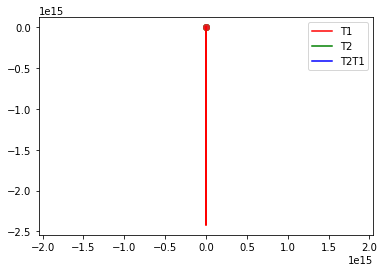

In [23]:
import numpy as np
import math

def local2global(x0, y0, yaw0, points):
    dx = np.array(points[0]) - x0
    dy = np.array(points[1]) - y0
    R = np.array([[math.cos(yaw0), -math.sin(yaw0)],
                  [math.sin(yaw0), math.cos(yaw0)]])
    point_arr = np.array([dx, dy])
    return np.dot(R, point_arr)


psT1 = [0.0, 0.0, 0.1]
pgT1 = [1.0, 3.0, np.pi/2.0]
#T20 = [2.0, 3.0, 0.4]
T20 = psT1
T2T10 = local2global(T20[0], T20[1], T20[2], [[0], [0]]).T[0].tolist()+[-T20[2]]




def PolyFit(ps, pg):
    x = np.linspace(ps[0], pg[0], 100)
    h = pg[0] - ps[0]
    xgx = pg[0] - x
    xxs = x - ps[0]
    Fs = (xgx*xgx*(2*xxs+h))/h**3
    Fg = (xxs*xxs*(2*xgx+h))/h**3
    Gs = (xgx*xgx*xxs)/h**2
    Gg = -(xxs*xxs*xgx)/h**2
    return x, Fs*ps[1]+Fg*pg[1]+Gs*np.tan(ps[2])+Gg*np.tan(pg[2])


import matplotlib.pyplot as plt
# step 1
xT1, yT1 = PolyFit(psT1, pgT1)
plt.plot(xT1, yT1, 'r', label="T1")
plt.scatter(psT1[0], psT1[1])
plt.scatter(pgT1[0], pgT1[1])
# step 2
psT2 = local2global(T20[0], T20[1], T20[2], [[psT1[0]], [psT1[1]]]).T[0].tolist()+[psT1[2]-T20[2]]
pgT2 = local2global(T20[0], T20[1], T20[2], [[pgT1[0]], [pgT1[1]]]).T[0].tolist()+[pgT1[2]-T20[2]]
xT2, yT2 = PolyFit(psT2, pgT2)
plt.plot(xT2, yT2, 'g', label="T2")
plt.scatter(psT2[0], psT2[1])
plt.scatter(pgT2[0], pgT2[1])
# step 3
xT2T1, yT2T1 = local2global(T2T10[0], T2T10[1], T2T10[2], [xT2, yT2])
plt.plot(xT2T1, yT2T1, 'b', label='T2T1')
plt.axis("equal")    
plt.legend()  
plt.show()

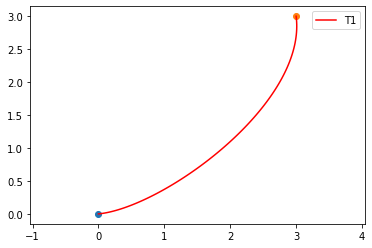

In [14]:
import numpy as np
import math

def local2global(x0, y0, yaw0, points):
    dx = np.array(points[0]) - x0
    dy = np.array(points[1]) - y0
    R = np.array([[math.cos(yaw0), -math.sin(yaw0)],
                  [math.sin(yaw0), math.cos(yaw0)]])
    point_arr = np.array([dx, dy])
    return np.dot(R, point_arr)


psT1 = [0.0, 0.0, 0.1, 3.0]
pgT1 = [3.0, 3.0, 1.7, 4.0]
T20 = [2.0, 3.0, 0.4]
#T20 = psT1
T2T10 = local2global(T20[0], T20[1], T20[2], [[0], [0]]).T[0].tolist()+[-T20[2]]

def PolyFit(ps, pg):
    t = np.linspace(0, 1, 100)
    Fs = (1-t)**2*(2*t+1)
    Fg = t**2*(3-2*t)
    Gs = (1-t)**2*t
    Gg = -t**2*(1-t)
    dxs = ps[3]*np.cos(ps[2])
    dys = ps[3]*np.sin(ps[2])
    dxg = pg[3]*np.cos(pg[2])
    dyg = pg[3]*np.sin(pg[2])
    return Fs*ps[0]+Fg*pg[0]+Gs*dxs+Gg*dxg, Fs*ps[1]+Fg*pg[1]+Gs*dys+Gg*dyg 


import matplotlib.pyplot as plt
# step 1
xT1, yT1 = PolyFit(psT1, pgT1)
plt.plot(xT1, yT1, 'r', label="T1")
plt.scatter(psT1[0], psT1[1])
plt.scatter(pgT1[0], pgT1[1])
# step 2
psT2 = local2global(T20[0], T20[1], T20[2], [[psT1[0]], [psT1[1]]]).T[0].tolist()+[psT1[2]-T20[2], psT1[3]]
pgT2 = local2global(T20[0], T20[1], T20[2], [[pgT1[0]], [pgT1[1]]]).T[0].tolist()+[pgT1[2]-T20[2], pgT1[3]]
xT2, yT2 = PolyFit(psT2, pgT2)
plt.plot(xT2, yT2, 'g', label="T2")
plt.scatter(psT2[0], psT2[1])
plt.scatter(pgT2[0], pgT2[1])
# step 3
xT2T1, yT2T1 = local2global(T2T10[0], T2T10[1], T2T10[2], [xT2, yT2])
plt.plot(xT2T1, yT2T1, 'b', label='T2T1')
plt.axis("equal")    
plt.legend()  
plt.show()

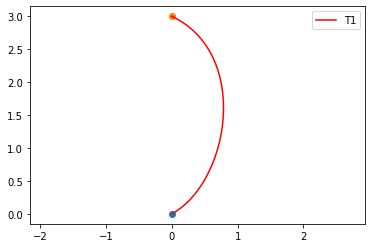

In [11]:
import numpy as np
import math

def local2global(x0, y0, yaw0, points):
    dx = np.array(points[0]) - x0
    dy = np.array(points[1]) - y0
    R = np.array([[math.cos(yaw0), -math.sin(yaw0)],
                  [math.sin(yaw0), math.cos(yaw0)]])
    point_arr = np.array([dx, dy])
    return np.dot(R, point_arr)


psT1 = [0.0, 0.0, 0.5, 3.0]
pgT1 = [0.0, 3.0, 2.7, 4.0]


def PolyFit(ps, pg):
    t = np.linspace(0, 1, 100)
    Fs = (1-t)**2*(2*t+1)
    Fg = t**2*(3-2*t)
    Gs = (1-t)**2*t
    Gg = -t**2*(1-t)
    dxs = ps[3]*np.cos(ps[2])
    dys = ps[3]*np.sin(ps[2])
    dxg = pg[3]*np.cos(pg[2])
    dyg = pg[3]*np.sin(pg[2])
    return Fs*ps[0]+Fg*pg[0]+Gs*dxs+Gg*dxg, Fs*ps[1]+Fg*pg[1]+Gs*dys+Gg*dyg 


import matplotlib.pyplot as plt
# step 1
xT1, yT1 = PolyFit(psT1, pgT1)
plt.plot(xT1, yT1, 'r', label="T1")
plt.scatter(psT1[0], psT1[1])
plt.scatter(pgT1[0], pgT1[1])
plt.axis("equal")    
plt.legend()  
plt.show()

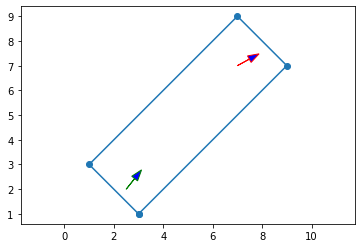

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Free_Area_points = [[3.0, 9.0, 7.0, 1.0, 3.0],
                  [1.0, 7.0, 9.0, 3.0, 1.0]]
#      x    y    yaw  v    k
ps = [2.5, 2.0, 0.9, 3.0, 0.0]
pg = [7.0, 7.0, 0.5, 4.0, 0.0]
plt.plot(Free_Area_points[0], Free_Area_points[1])
plt.scatter(Free_Area_points[0], Free_Area_points[1])
plt.arrow(ps[0], ps[1], np.cos(ps[2]), np.sin(ps[2]), length_includes_head=True,head_width=0.3, fc='b', ec='g')
plt.arrow(pg[0], pg[1], np.cos(pg[2]), np.sin(pg[2]), length_includes_head=True,head_width=0.3, fc='b', ec='r')
plt.axis("equal")
plt.show()

In [3]:
def Get_A(ch_points):
    A = []
    for i in range(len(ch_points[0])-1):
        a = ch_points[0][i+1] - ch_points[0][i]
        b = ch_points[1][i] - ch_points[1][i+1]
        c = ch_points[1][i]*a+ch_points[0][i]*b
        A.append([a, b, c])
    return A
A = Get_A(Free_Area_points)
print("A:", Get_A(Free_Area_points))

A: [[6.0, -6.0, -12.0], [-2.0, -2.0, -32.0], [-6.0, 6.0, -12.0], [2.0, 2.0, 8.0]]


In [4]:
def point_in_ConvexHull_judge(p, A):
    A_mat = np.array(A)
    x = np.array([p[1], p[0], -1]).T
    M = np.dot(A_mat, x)
    if np.min(M) > 0:
        return True
    return False

print(point_in_ConvexHull_judge([2.5,2.0], A))

True


In [6]:
import numpy as np
import math
from pyomo.environ import *
from pyomo.dae import *

v_max = 10.0
k_max = 0.5
N = 10
m = ConcreteModel()
# Parameters

pw = {(0, 0):1.0, (0, 1):1.0, (0, 2):1.0, (0, 3):1.0, (0, 4):1.0, (0, 5):1.0,
      (1, 0):0.0, (1, 1):5.0, (1, 2):4.0, (1, 3):3.0, (1, 4):2.0, (1, 5):1.0,
      (2, 0):0.0, (2, 1):0.0, (2, 2):20.0,(2, 3):12.0,(2, 4):6.0, (2, 5):2.0,
      (3, 0):0.0, (3, 1):0.0, (3, 2):0.0, (3, 3):60.0,(3, 4):24.0,(3, 5):6.0}

m.pw = Param(RangeSet(0, 3), RangeSet(0, 5), initialize=pw)

def _polyfun(m, k, i, j):
    return (m.p[k, i, j] == m.pw[k, 0]*m.c[i, max(0-k, 0)]*(m.dt*j)**5+
                            m.pw[k, 1]*m.c[i, max(1-k, 0)]*(m.dt*j)**4+
                            m.pw[k, 2]*m.c[i, max(2-k, 0)]*(m.dt*j)**3+
                            m.pw[k, 3]*m.c[i, max(3-k, 0)]*(m.dt*j)**2+
                            m.pw[k, 4]*m.c[i, max(4-k, 0)]*(m.dt*j)**1+m.pw[k, 5]*m.c[i, max(5-k, 0)])

# 多项式系数
m.c = Var(RangeSet(0, 1), RangeSet(0, 5))
# 多项式曲线采样点的0-3阶导数
m.p = Var(RangeSet(0, 3), RangeSet(0, 1), RangeSet(0, N-1))
# 时间
m.dt = Var(domain=NonNegativeReals)

# 多项式曲线公式约束
m.poly_cons = Constraint(RangeSet(0, 3), RangeSet(0, 1), RangeSet(0, N-1), rule=_polyfun)
# 速度约束
m.speed_con = Constraint(RangeSet(0, N-1), rule=lambda m, i: m.p[1,0,i]**2+m.p[1,1,i]**2<=v_max*v_max)
#起点约束 位置、姿态、速度、曲率
m.conslist = ConstraintList()
m.conslist.add(expr=m.p[0, 0, 0] == ps[0]) # x
m.conslist.add(expr=m.p[0, 1, 0] == ps[1]) # y
m.conslist.add(expr=m.p[1, 0, 0] == ps[3]*cos(ps[2])) # theta v
m.conslist.add(expr=m.p[1, 1, 0] == ps[3]*sin(ps[2])) # k
# m.conslist.add(expr=(m.p[2,1,0]*m.p[1,0,0]-m.p[2,0,0]*m.p[1,1,0])**2==ps[4]**2*(m.p[1,0,0]**2+m.p[1,1,0]**2)**(3))
#目标约束 位置、姿态、速度、曲率
m.conslist.add(expr=m.p[0, 0, N-1] == pg[0]) # x
m.conslist.add(expr=m.p[0, 1, N-1] == pg[1]) # y
m.conslist.add(expr=m.p[1, 0, N-1] == pg[3]*cos(pg[2])) # theta v
m.conslist.add(expr=m.p[1, 1, N-1] == pg[3]*sin(pg[2])) # k
# m.conslist.add(expr=(m.p[2,1,N-1]*m.p[1,0,N-1]-m.p[2,0,N-1]*m.p[1,1,N-1])**2==pg[4]**2*(m.p[1,0,N-1]**2+m.p[1,1,N-1]**2)**(3))
# 曲率约束
m.kappa_conl = Constraint(RangeSet(0, N-1), rule=lambda m, i: (m.p[2,1,i]*m.p[1,0,i]-m.p[2,0,i]*m.p[1,1,i])**2<=k_max**2*(m.p[1,0,i]**2+m.p[1,1,i]**2)**(3))
# 自由空间约束
m.CH_con = Constraint(RangeSet(0, N-1), RangeSet(0, len(A)-1), rule=lambda m, i, j: m.p[0,1,i]*A[j][0]+m.p[0,0,i]*A[j][1]-A[j][2] >= 0)
# 目标函数中各指标项的权值
m.coeffs = Param(RangeSet(0, 1), initialize={0:10.0, 1:0.2}, mutable=True)
# 目标函数
m.uxobj = m.coeffs[0]*sum(m.p[3, 0, k]**2 for k in RangeSet(0, N-1))
m.uyobj = m.coeffs[0]*sum(m.p[3, 1, k]**2 for k in RangeSet(0, N-1))
m.tobj = m.coeffs[1]*m.dt*N
m.obj = Objective(expr=m.uxobj+m.uyobj+m.tobj, sense=minimize)
%time SolverFactory('ipopt').solve(m)
m.display()

CPU times: user 17 ms, sys: 4.62 ms, total: 21.6 ms
Wall time: 139 ms
Model unknown

  Variables:
    c : Size=12, Index=c_index
        Key    : Lower : Value                  : Upper : Fixed : Stale : Domain
        (0, 0) :  None :   -0.02691548928375197 :  None : False : False :  Reals
        (0, 1) :  None :    0.14421874405258675 :  None : False : False :  Reals
        (0, 2) :  None :   0.008722441277137906 :  None : False : False :  Reals
        (0, 3) :  None :    -0.3066599742163015 :  None : False : False :  Reals
        (0, 4) :  None :     1.8648299048119932 :  None : False : False :  Reals
        (0, 5) :  None :                    2.5 :  None : False : False :  Reals
        (1, 0) :  None :   0.009110520567451178 :  None : False : False :  Reals
        (1, 1) :  None :  -0.048816048634628934 :  None : False : False :  Reals
        (1, 2) :  None : -0.0029524256395089305 :  None : False : False :  Reals
        (1, 3) :  None :     0.1328911686462814 :  None : Fal

2.1432825170983896 [[-0.02691549  0.14421874  0.00872244 -0.30665997  1.8648299   2.5       ]
 [ 0.00911052 -0.04881605 -0.00295243  0.13289117  2.34998073  2.        ]]


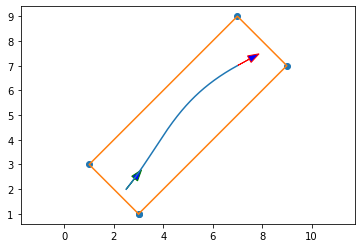

In [7]:
def PolyCurve5(c, T):
    t = np.linspace(0, T, 1000)
    px = c[0,0]*t**5+c[0,1]*t**4+c[0,2]*t**3+c[0,3]*t**2+c[0,4]*t+c[0,5]
    py = c[1,0]*t**5+c[1,1]*t**4+c[1,2]*t**3+c[1,3]*t**2+c[1,4]*t+c[1,5]
    return px, py
    
Tg = m.dt()*(N-1)
c = np.array([[m.c[i,j]() for j in range(6)] for i in range(2)])
print(Tg, c)
px, py = PolyCurve5(c, Tg)

# px = np.array([m.p[0, 0, i]() for i in range(N)])
# py = np.array([m.p[0, 1, i]() for i in range(N)])
# print(px[-1], py[-1])
plt.plot(px, py)

plt.plot(Free_Area_points[0], Free_Area_points[1])
plt.scatter(Free_Area_points[0], Free_Area_points[1])
plt.arrow(ps[0], ps[1], np.cos(ps[2]), np.sin(ps[2]), length_includes_head=True,head_width=0.3, fc='b', ec='g')
plt.arrow(pg[0], pg[1], np.cos(pg[2]), np.sin(pg[2]), length_includes_head=True,head_width=0.3, fc='b', ec='r')
plt.axis("equal")
plt.show()

